Importing Libraries for our Project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Now comes the first step DATA CLEANING.

In [ ]:
dataset = pd.read_csv('advertising.csv')

In [ ]:
dataset.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

In [ ]:
dataset.describe()

Daily Time Spent on Site          Age  ...         Male  Clicked on Ad
count               1000.000000  1000.000000  ...  1000.000000     1000.00000
mean                  65.000200    36.009000  ...     0.481000        0.50000
std                   15.853615     8.785562  ...     0.499889        0.50025
min                   32.600000    19.000000  ...     0.000000        0.00000
25%                   51.360000    29.000000  ...     0.000000        0.00000
50%                   68.215000    35.000000  ...     0.000000        0.50000
75%                   78.547500    42.000000  ...     1.000000        1.00000
max                   91.430000    61.000000  ...     1.000000        1.00000

[8 rows x 6 columns]

Checking for null values

In [ ]:
dataset.isnull()

Daily Time Spent on Site    Age  ...  Timestamp  Clicked on Ad
0                       False  False  ...      False          False
1                       False  False  ...      False          False
2                       False  False  ...      False          False
3                       False  False  ...      False          False
4                       False  False  ...      False          False
..                        ...    ...  ...        ...            ...
995                     False  False  ...      False          False
996                     False  False  ...      False          False
997                     False  False  ...      False          False
998                     False  False  ...      False          False
999                     False  False  ...      False          False

[1000 rows x 10 columns]

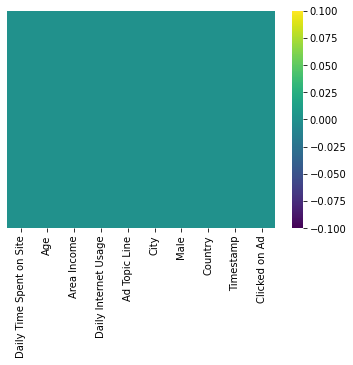

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis',cbar=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


As we can see there are no missing values or null values in any of the column so we can stop our DATA Cleaning Part.

Part-2) Exploratory Data Analysis

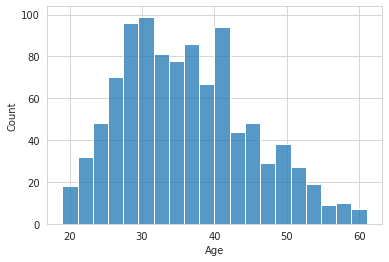

In [ ]:
sns.set_style('whitegrid')
sns.histplot(x='Age',bins=20,data=dataset)

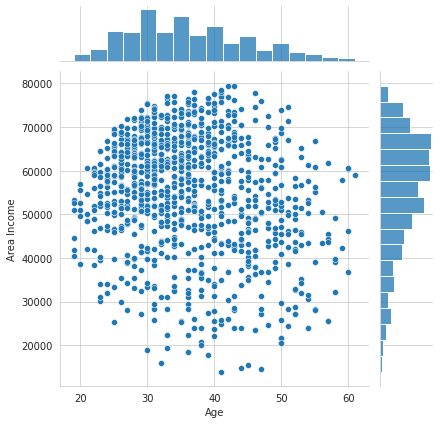

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=dataset)

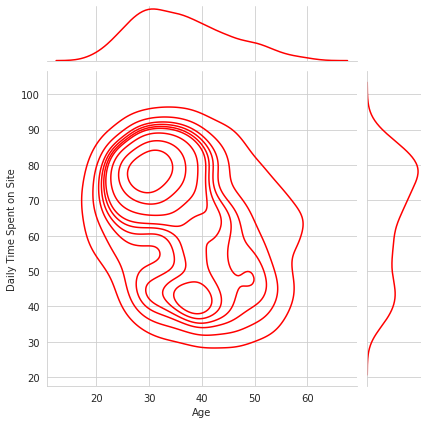

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=dataset,color='red',kind='kde')

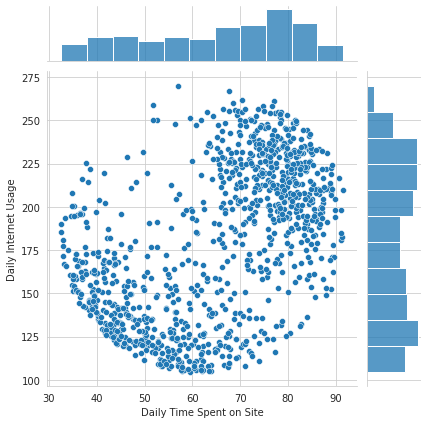

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=dataset)

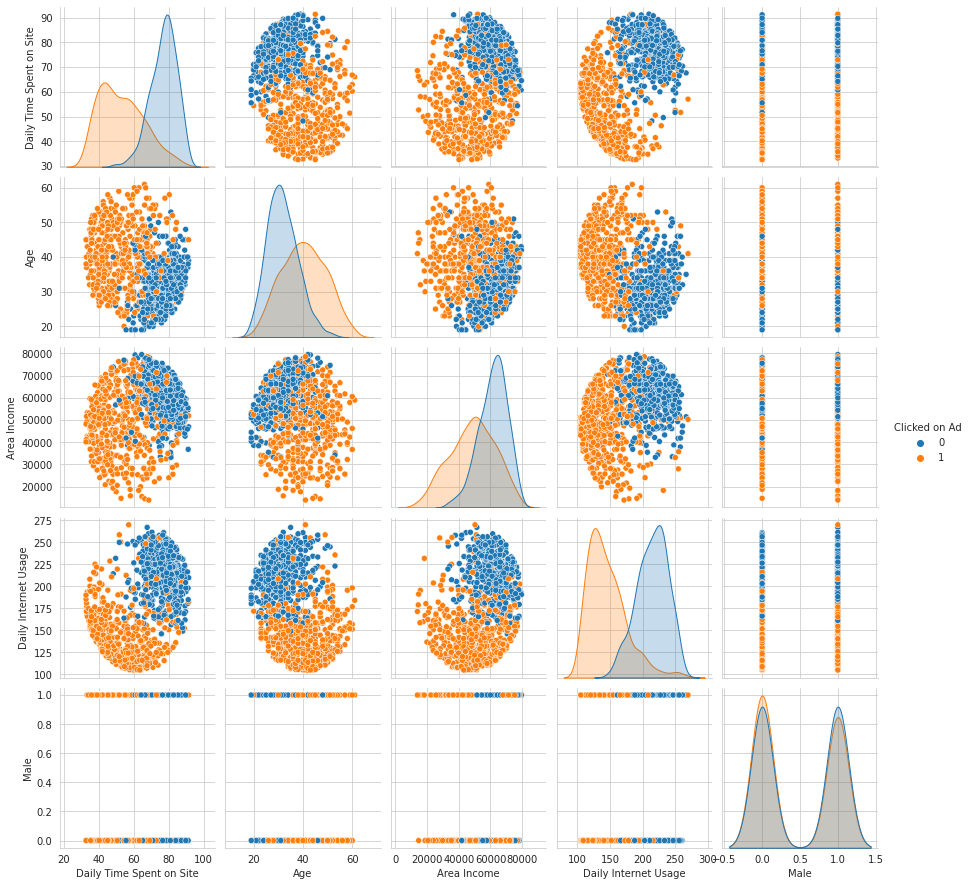

In [ ]:
sns.pairplot(data=dataset,hue='Clicked on Ad')

Taking Matrix of Feature(x) and Dependent Vector(y)

In [ ]:
x = dataset.loc[:,['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = dataset.loc[:,'Clicked on Ad']

In [ ]:
print(x)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64


Spliting The Data into Trainig set and Train set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
105                     80.49   40     67186.54                229.12     1
68                      75.74   25     61005.87                215.25     1
479                     39.76   28     35350.55                196.83     1
399                     77.29   27     66265.34                201.24     1
434                     83.55   39     65816.38                221.18     1
..                        ...  ...          ...                   ...   ...
835                     63.11   34     63107.88                254.94     1
192                     60.70   49     42993.48                110.57     1
629                     73.94   26     55411.06                236.15     1
559                     78.64   31     60283.47                235.28     1
684                     42.06   34     43241.19                131.55     0

[700 rows x 5 columns]


In [ ]:
print(x_test)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
993                     64.20   27     66200.96                227.63     1
859                     83.17   43     54251.78                244.40     1
298                     80.39   31     66269.49                214.74     0
553                     44.73   35     55316.97                127.56     1
672                     89.21   33     44078.24                210.53     0
..                        ...  ...          ...                   ...   ...
167                     86.06   31     53767.12                219.72     1
998                     55.55   19     41920.79                187.95     0
984                     66.47   31     58037.66                256.39     1
491                     59.12   33     28210.03                124.54     0
10                      47.64   49     45632.51                122.02     0

[300 rows x 5 columns]


In [ ]:
print(y_train)

105    0
68     0
479    1
399    0
434    0
      ..
835    0
192    1
629    0
559    0
684    1
Name: Clicked on Ad, Length: 700, dtype: int64


In [ ]:
print(y_test)

993    0
859    0
298    0
553    1
672    0
      ..
167    0
998    0
984    0
491    1
10     1
Name: Clicked on Ad, Length: 300, dtype: int64


Lets Train our Logistic Regression Model on the training set.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Lets predict the new test result

In [ ]:
y_pred = classifier.predict(x_test)


Let's Evaluate our Model using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[155  16]
 [  9 120]]


0.9166666666666666